# Advent of Haystack - Day 6
_Make a copy of this Colab to start_


## Task 1 - Santa's Workshop: Optimal Elf Assignment



There's always so much to do to prepare for Christmas! All the toys need to be ready, the visitors to Christmas village have to be welcomed, and the assembly line machines need to be maintained.

Fortunately, Santa has learnt a very important skill throughout the years - *delegating*. This year, he tasked elf Rita to make sure everything runs smoothly!

Elf Rita is managing a growing team of elves, each with unique skills, and an ever-expanding list of holiday tasks. She needs to assign the best elf to each task.

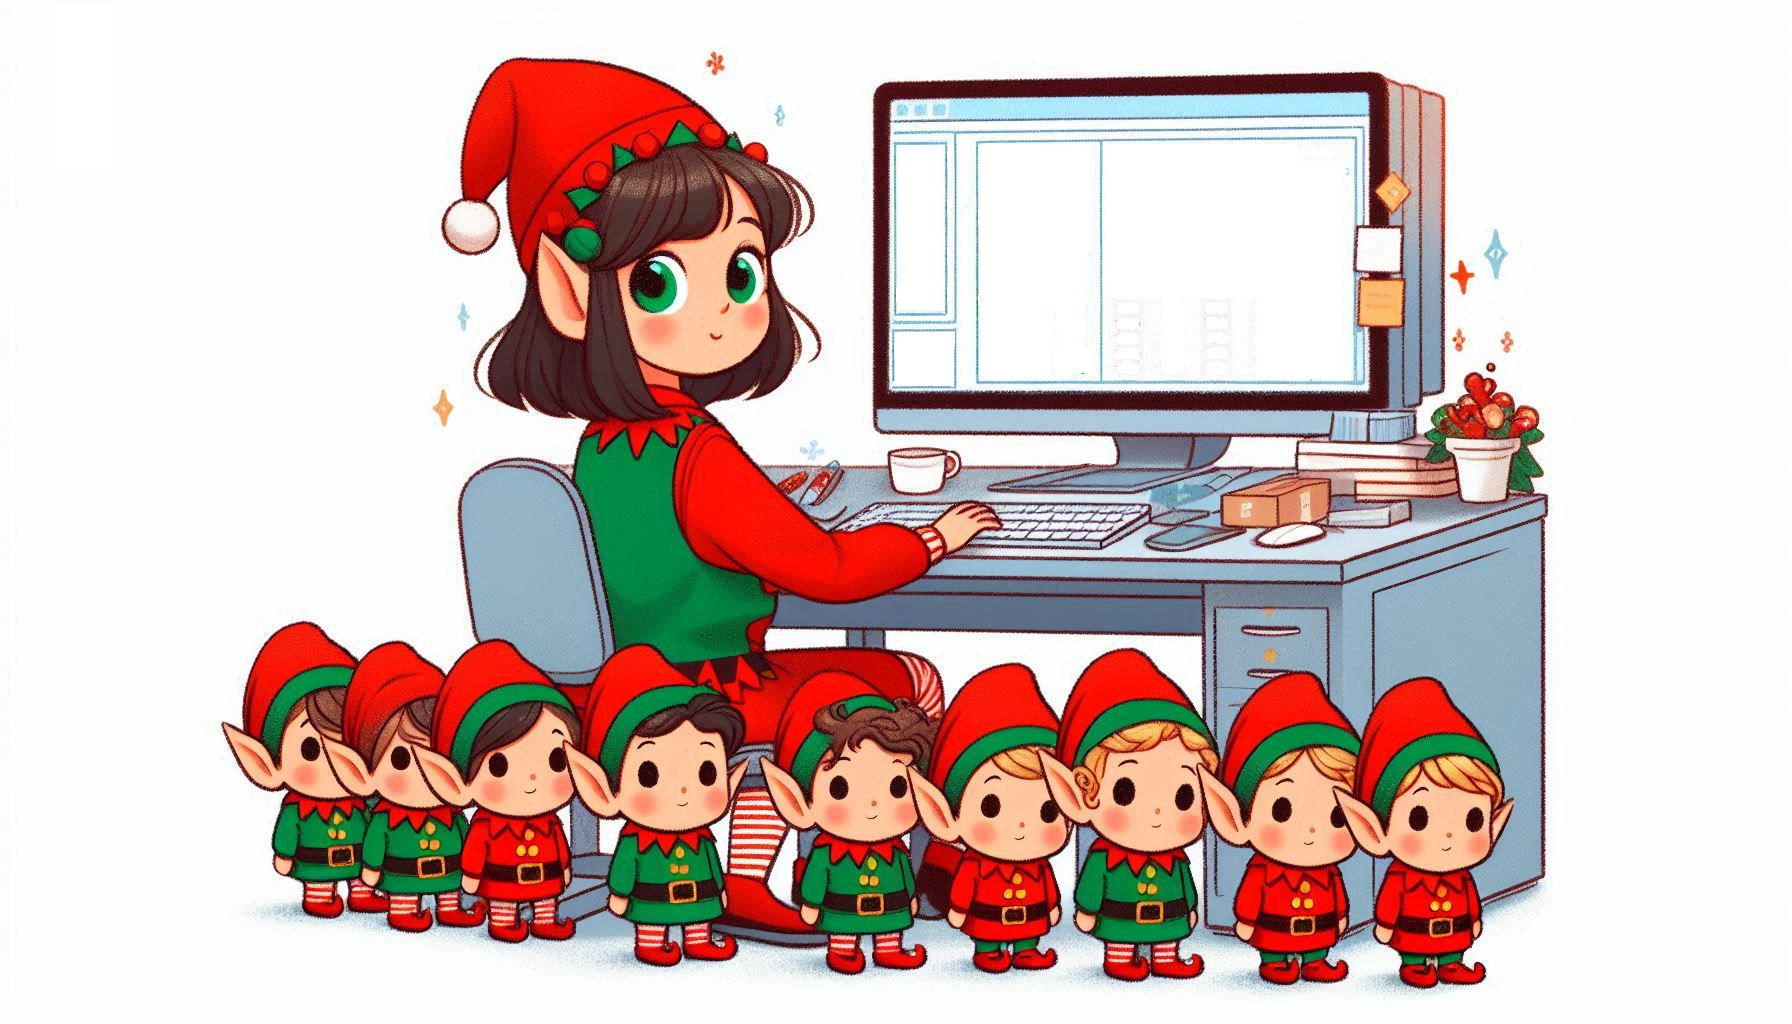

Elf Rita is a big fan of AI technology, and thought the best idea would be to use a **ranking model** to rank the likelihood of a task being a good fit for an elf. Matching elves to tasks isn't easy, since some of them require specific skills or personality traits - still, it's fine if more than one elf is assigned to the same task.

Can you help elf Rita implement this system?

### Components to use:
- [NvidiaRanker](https://docs.haystack.deepset.ai/docs/nvidiaranker)
- [NvidiaTextEmbedder](https://docs.haystack.deepset.ai/docs/nvidiatextembedder)
- [DocumentMRREvaluator](https://docs.haystack.deepset.ai/docs/documentmrrevaluator)


## Pre-Requisites

Create a free personal account in https://build.nvidia.com/ by clicking on the top right button. This will give you access to free tokens to access NVIDIA models and complete this exercise. Once you have an account, generate an API key by clicking on any model and choosing **Build this with NIM** on the top right side.

## Environment Downloads

In [ ]:
!pip install nvidia-haystack gdown

## Datasets

1. `task1_elf_profiles.csv`: a short description of each elf's expertise, traits, and preferences
2. `task1_descriptions.csv`: a description of what each task involves
3. `task1_solution_key.csv`: the optimal elf-task assignment (don't peek!🫣)
4. `task2_parent_notes.xlsx`: the messages that Santa got from the parents all over the world requesting to leave the gifts in specific places
5. `task2_solution_key.xlsx`: the right assignment of messages-places (don't open!🔒)

In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/1Oxn9M7cpIeuDlQ4tn4wUvqAKVRW0bNTC?usp=sharing"
output_dir = "challenge_files"

gdown.download_folder(url, quiet=True, output=output_dir)

Choose how to add your API key. <br> **Option 1**: add it directly to the cell below <br> **Option 2**: add the API key to your Colab environment by hitting the "Secrets" tab on the left hand side of this notebook. Choose **Add new secret**, add *NVIDIA_API_KEY* as name, with your key as value.

In [ ]:
import os
from google.colab import userdata

os.environ["NVIDIA_API_KEY"] = "<YOUR_KEY_HERE>"
# os.environ["NVIDIA_API_KEY"] = userdata.get("NVIDIA_API_KEY")   ## Uncomment for Option 2

### **Task 1**

> **Complete the code below to use Haystack and a ranking model from [NVIDIA](https://build.nvidia.com/explore/retrieval) to match the best task to each elf.** <br>
**Your tasks are marked with ### COMPLETE ### comments.**



Data Loading

In [ ]:
import pandas as pd

elf_profiles_df = pd.read_csv('challenge_files/task1_elf_profiles.csv')
elf_profiles_df.head(3)

In [ ]:
task_descriptions_df = pd.read_csv('challenge_files/task1_descriptions.csv')
task_descriptions_df.head(3)

In [ ]:
elf_profiles = elf_profiles_df.to_dict()

elf_names = list(elf_profiles["Elf Name"].values())
elf_descriptions = list(elf_profiles["Profile Description"].values())

task_descriptions = task_descriptions_df.to_dict()
task_descriptions = list(task_descriptions["Task Description"].values())

Ranker Implementation

In [ ]:
from haystack_integrations.components.rankers.nvidia import NvidiaRanker
from haystack import Document
from haystack.utils import Secret

tasks = []

for idx, t in enumerate(task_descriptions):
  tasks.append(Document(content=t, id=idx+1))

### COMPLETE ###
# Look into the NvidiaRanker component and choose a reranker model from https://build.nvidia.com/explore/retrieval
ranker = ... # TODO

ranker.warm_up()

all_elf_compatibility = []
for i, elf in enumerate(elf_descriptions):
  ### COMPLETE ###
  # For each elf, run the ranker model on all tasks to find the best match
  elf_compatibility = ..... # TODO

  all_elf_compatibility.append(elf_compatibility)

In [ ]:
# Printing the solution! - Best task for each elf
for i in range(len(all_elf_compatibility)):
  print(f"The best task for elf {elf_names[i]} is {all_elf_compatibility[i]['documents'][0].content}")

In [ ]:
### COMPLETE ###
# Repeat the exercise with an alternative ranker model in build.nvidia.com
# TIP💡: If you used nv-rerankqa-mistral-4b-v3, use llama-3.2-nv-rerankqa-1b-v1 now or vice-versa)
alternative_ranker = .... # TODO

alternative_ranker.warm_up()

alternative_all_elf_compatibility = []
for i, elf in enumerate(elf_descriptions):
  ### COMPLETE ###
  # For each elf, run the alternative ranker model on all tasks and append them to the list alternative_all_elf_compatibility
  elf_compatibility = ..... # TODO


In [ ]:
# Printing the solution! - Best task for each elf
for i in range(len(alternative_all_elf_compatibility)):
  print(f"The best task for elf {elf_names[i]} is {alternative_all_elf_compatibility[i]['documents'][0].content}")

Ranker Performance Comparison

In [ ]:
from haystack.components.evaluators import DocumentMRREvaluator

# Getting the ground truth: optimal task-elf placement
ground_truth = pd.read_csv('challenge_files/task1_solution_key.csv').to_dict()
ground_truth = list(ground_truth["Task ID"].values())

# Getting the ranking and alternative_ranking actual results
ranking = [all_elf_compatibility[index]['documents'][0].id for index in range(len(all_elf_compatibility))]
alternative_ranking = [alternative_all_elf_compatibility[index]['documents'][0].id for index in range(len(alternative_all_elf_compatibility))]

In [ ]:
### COMPLETE ###
# Compare the results of the two ranker models using the Mean Reciprocal Rank (MRR) score. This is a ranking quality metric that only considers the position of the first relevant item in the ranked list.
mrr_evaluator = ....... # TODO

ground_truth_documents = []
ranking_documents = []
alternative_ranking_documents = []

for idx, gt in enumerate(ground_truth):
  ground_truth_documents.append([Document(content=gt)])
  ranking_documents.append([Document(content=ranking[idx])])
  alternative_ranking_documents.append([Document(content=alternative_ranking[idx])])

### COMPLETE ###
# Run the mrr_evaluator over the original and the alternative rankers' results
result_ranker = .... # TODO
result_alternative_ranker = .... # TODO

print(f"MRR for the first ranker is {result_ranker['score']}")
print(f"MRR for the second ranker is {result_alternative_ranker['score']}")

## Task 2 - Santa's Workshop: Delivery Organiser

Congratulations! With your help, elf Rita managed to assign the best task for each elf, making everyone happy and preserving the spirit of Christmas.

Santa is very happy with this outcome. To reward elf Rita for doing a great job, he makes her responsible for more work (with the vague promise of a promotion in the near future).

The new task is this: every year, Santa receives Christmas letters from children. On the backs of the letters, he gets notes from parents with instructions on where to leave the gifts. These notes, written in languages from all over the word, give indications of where best to leave the gifts. The options are:

1. Under the Christmas Tree
2. Under the Children's Beds
3. Near the Fireplace
4. In the Stockings

Elf Rita does not know all the languages in the world - however, she knows AI!
Help her by using a multilingual embedder and a cosine similarity algorithm to match the diverse descriptions to their categories.

### **Task 2**

**Complete the code snippets below to use Haystack and a multilingual embedding model from [NVIDIA](https://build.nvidia.com/nvidia/llama-3_2-nv-embedqa-1b-v1) to group these notes based on their semantic meaning, regardless of the language they are written in.**<br>
**Again, your tasks are marked with ### COMPLETE ### comments.**


Read the Task Data

In [ ]:
parent_notes_df = pd.read_excel('challenge_files/task2_parent_notes.xlsx')
parent_notes_df.head(3)

In [ ]:
parent_notes = parent_notes_df.to_dict()
parent_notes = list(parent_notes['Notes'].values())

### COMPLETE ###
# Based on the task description above, input the possible locations for the presents
# TIP💡: They are 4
location_options = [...] # TODO

Embedding the text

In [ ]:
from haystack_integrations.components.embedders.nvidia import NvidiaTextEmbedder

### COMPLETE ###
# Look into the NvidiaTextEmbedder component and choose an embedding model from https://build.nvidia.com/explore/retrieval
embedder = ..... # TODO

embedder.warm_up()

In [ ]:
embedded_notes =[]
for note in parent_notes:
  embedded_notes.append(embedder.run(note))

embedded_locations =[]
for l in location_options:
  embedded_locations.append(embedder.run(l))

Computing the similarity between notes and location options

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

max_cos_similarity_per_note = []
for i in range(len(embedded_notes)):
  cos_similarity_per_note = []
  for j in range(len(embedded_locations)):
    ### COMPLETE ###
    # Use the function cosine_similarity to compute the similarity score between embedded_notes and embedded_locations
    cos_similarity_per_note.append(cosine_similarity(.....)) # TODO

  # Get the best match with argmax
  max_cos_similarity_per_note.append(np.argmax(cos_similarity_per_note))

Embedder Performance Evaluation

In [ ]:
# Read the ground truth data
ground_truth_data = pd.read_excel('challenge_files/task2_solution_key.xlsx').to_dict()
ground_truth_data = list(ground_truth_data['Key'].values())

print(ground_truth_data)
print(max_cos_similarity_per_note)

### COMPLETE ###
# Calculate the accuracy of the solution by comparing max_cos_similarity_per_note to ground_truth_data
# TIP💡: The accuracy is the number of True Positives divided by all solutions!
...
accuracy = ... # TODO

In [ ]:
print(f"The accuracy of this embedder is {accuracy}")

## Conclusion:

With your incredible AI skills, Elf Rita was able to successfully manage both Santa's Workshop and gift deliveries. Everything should now be ready for Christmas!🎄

<sub><sup>PS - Due to her customer obsession and ability to innovate and disrupt using AI, Elf Rita got her promotion after all!🌟

